First and foremost, the KNN algorithm is a `Supervised` Machine Learning algorithm, which means, we have the labels of the training set. 

The idea behind this algorithm is very simple: 

    1. In the features-space, we see where the new data falls. We check the k nearest points from this point. 
    2. The label this algorithm will asign to the new point will be the most present label of those k neighbors. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

import seaborn as sns; sns.set()

%matplotlib inline

In [2]:
class KNNClassifier: 
    """
    Parameters
    ------------
    n_neighbors: int
        How many neighbors to consider to preform the algorithm
    n_features: int
        How many features does our data has
    n_classes: int
        How many classes are there in the dataset
        
        
    Attributes
    -----------
    k_neighbors: nd-array
        This array contains the k nearest points to the test value
    k_labels_: nd-array
        This array contains the k nearest points labels to the test value
    proba_: nd-array
        For each point, the probability of each class
    """
    
    def __init__(self, n_neighbors=1, n_features=2, n_classes=3):
        self.n_neighbors = n_neighbors
        self.n_features = n_features
        self.n_classes = n_classes
        
    def fit(self, X, y):
        """
        fit the data to the model 
        
        X: nd-array, shape = [n_samples, n_features]
            Features of every instance. 
            
        y: 1-array, shape = [n_samples]
            Target values
        """
        self.X = X
        self.y = self._encode(y)
                
    def predict(self, x):
        """
        Get the label of the instance / instances x
        
        x: nd-array
            Values to predict their labels
        """
        
        self._predict(x)
        
        most_present_label = np.zeros((len(x),), dtype=int)
        for i in range(len(x)):
            n_l = self.k_labels_[i] # neighbors labels
            most_present = np.argmax(np.sum(n_l, axis=0))
            most_present_label[i] = most_present

        return most_present_label
    

    def _predict(self, x):
        
        distances = self.__compute_distances(x)
            
        index_distances = np.argsort(distances, axis=0)[:self.n_neighbors, :]
        self.k_neighbors_ = np.zeros((len(x), self.n_neighbors, self.n_features)) 
        self.k_labels_ = np.zeros((len(x), self.n_neighbors, self.n_classes), dtype=int)

        for i in range(len(x)):
            index_neighbors = index_distances.T[i]
            self.k_neighbors_[i] = self.X[index_neighbors]
            self.k_labels_[i] = self.y[index_neighbors]

        self.proba_ = np.sum(self.k_labels_, axis=1) / self.n_neighbors
                        
    @staticmethod
    def _encode(y):
        y_enc = np.zeros((len(y), len(np.unique(y))), dtype=int)
        for i, val in enumerate(y):
            y_enc[i, val] = 1
            
        return y_enc
        
    def __compute_distances(self, x):
        
        distances = np.zeros((len(self.X), len(x.squeeze())))
        
        for i, point in enumerate(x):
            distances[:, i] = np.sqrt(np.sum((self.X - point) ** 2, axis=1))
        
        return distances.squeeze()

In [3]:
from matplotlib.colors import ListedColormap

def plot_decision_boundaries(X, y, classifier, k=1,
                             margin=1, resolution=0.02):
    
    colors = ('red', 'blue', 'lightgreen', 'black', 'yellow')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - margin, X[:, 0].max() + margin
    x2_min, x2_max = X[:, 1].min() - margin, X[:, 1].max() + margin
    
    X1, X2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                         np.arange(x2_min, x2_max, resolution))
    
    Z = np.array([X1.ravel(), X2.ravel()]).T

    Z_label = classifier.predict(Z).reshape(X1.shape)
    
    plt.figure(figsize=(10, 7))
    
    plt.title(f'K-Nearest-Neighbors with {k} neighbors', fontsize=35)
    plt.contourf(X1, X2, Z_label, cmap=cmap, alpha=0.3)
    
    for cls in np.unique(y):
        plt.scatter(X[y == cls, 0], X[y == cls, 1], 
                    c=colors[cls], label=cls, edgecolor='black')
        
    plt.legend()
    plt.show()
    
def plot_dataset_and_prediction(X, y, classifier, sample):
    
    fig = plt.figure(figsize=(10, 7))
    colors = ('red', 'blue', 'green', 'black', 'yellow')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    for i in range(len(np.unique(y))):
        plt.scatter(X[y == i, 0], X[y == i, 1], 
                    c=np.array(colors)[i], edgecolor='black', alpha=0.3)
    
    prediction = classifier.predict(np.array(sample))
    neighbors = classifier.k_neighbors_
    
    s_indx = np.random.randint(low=0, high=len(neighbors))
    n = neighbors[s_indx]
    s = sample[s_indx]
    p = prediction[s_indx]
    
    plt.scatter(sample[:, 0], sample[:, 1], edgecolor='black',
                c=np.array(colors)[prediction], label='Test Set')
    plt.scatter(n[:, 0], n[:, 1], c=[], s=200, 
                edgecolor='black', ls='--', label='Example Neighbors')
    plt.scatter(s[0], s[1], s=200, edgecolor=colors[p], c=[], label='Example')
    
    plt.legend()
    plt.show()

## 1. Iris data set

In [4]:
iris = datasets.load_iris()
X = iris.data[:, (0, 2)] # features: sepal length and petal length
y = iris.target

accuracy = []

for k in range(1, 10):
    KNN = KNNClassifier(k)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, stratify=y, 
                                                    random_state=np.random.randint(1000))
    
    KNN.fit(X_train, y_train)
    
    predictions = KNN.predict(X_test)
    
    accuracy.append(np.round(np.sum(predictions == y_test) / len(y_test), decimals=3))
    
print(np.round(np.mean(accuracy) * 100, decimals=3))

94.433


In [7]:
neighbors = 5
KNN = KNNClassifier(neighbors)
KNN.fit(X_train, y_train)

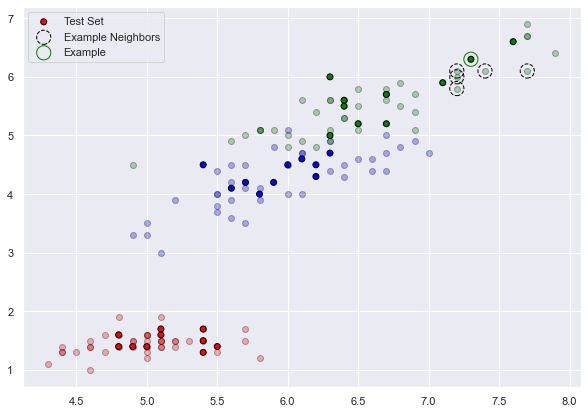

In [8]:
plot_dataset_and_prediction(X_train, y_train, KNN, X_test)

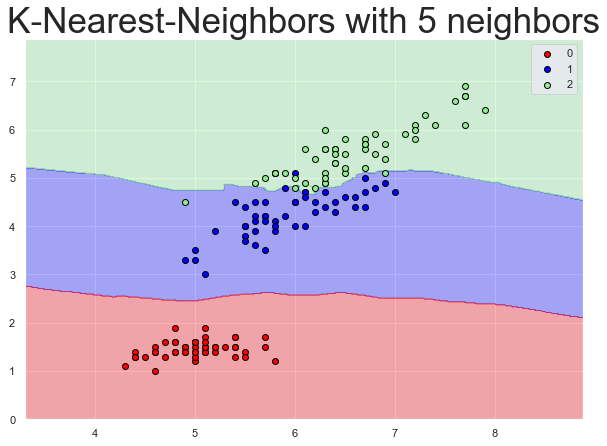

In [9]:
plot_decision_boundaries(X, y, KNN, k=neighbors)

## 2. Make blobs

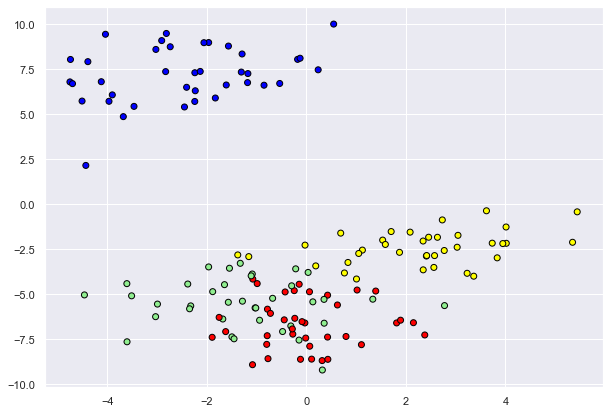

In [19]:
X, y = make_blobs(n_samples=150, cluster_std=1.4, centers=4)

colors = ('red', 'blue', 'lightgreen', 'yellow')

fig = plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=np.array(colors)[y], edgecolor='black')
plt.show()

In [20]:
accuracy = []

for k in range(1, 10):
    KNN = KNNClassifier(k, n_classes=4)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, stratify=y, 
                                                    random_state=np.random.randint(1000))
    
    KNN.fit(X_train, y_train)
    
    predictions = KNN.predict(X_test)
    
    accuracy.append(np.round(np.sum(predictions == y_test) / len(y_test), decimals=3))
    
print(np.round(np.mean(accuracy) * 100, decimals=3))

81.856


In [21]:
KNN = KNNClassifier(5, n_classes=4)
KNN.fit(X_train, y_train)

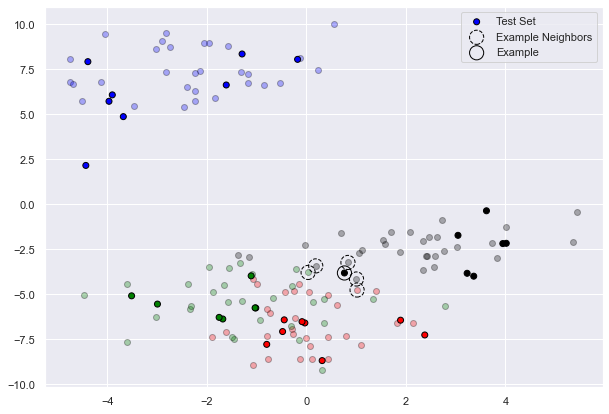

In [22]:
plot_dataset_and_prediction(X_train, y_train, KNN, X_test)

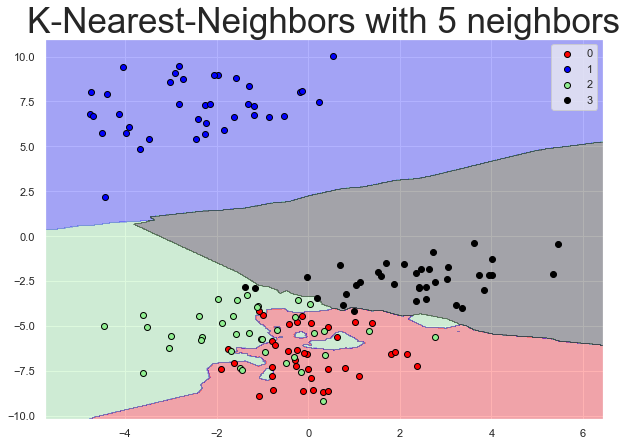

In [23]:
plot_decision_boundaries(X, y, KNN, 5)